# Using Decision Trees to Diagnose Breast Cancer

Now that we have built our first decision trees, it's time to turn our attention to a real dataset: The Breast Cancer Wisconsin dataset <https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>.

In order to make the take feasible, the researchers performed feature extraction on the images, like we did in Chapter 4, Representing Data and Engineering Features. They went through a total of 569 images, and extracted 30 different features that describe the characteristics of the cell nuclei present in the images, including:

- cell nucleus texture (represented by the standard deviation of the gray-scale values)

- cell nucleus size (calculated as the mean of distances from center to points on the perimeter)

- tissue smoothness (local variation in radius lengths)

- tissue compactness

The goal of the research was then to classify tissue samples into benign and malignant (a binary classification task).

## Loading the dataset

The full dataset is part of Scikit-Learn's example datasets:

In [1]:
from sklearn import datasets
import pandas as pd

data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# Create training and testing sets for your model
target = df['target']
del df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

## For Student To Complete:

In [3]:
# Create a logistic regression model and fit the model to your training data. 
# Then get the model's predicitons for the testing data and display the accuracy 
# Display the confusion matrix using 'ConfusionMatrixDisplay'
# Next, print the coefficients and intercept 

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(X_train, y_train)
accuracy = logistic_regression.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.974


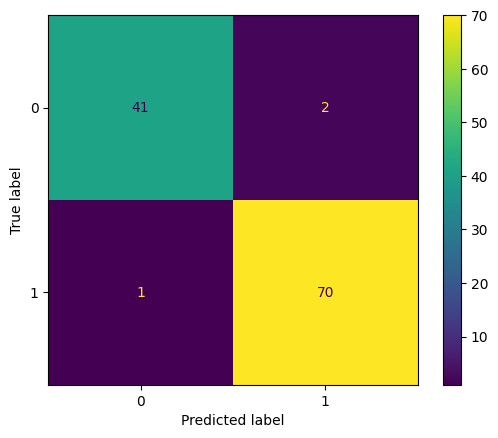

In [5]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
y_pred = logistic_regression.predict(X_test)
cm  = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=logistic_regression.classes_)
disp.plot()

## Analysis
#### Once you have completed the coding portion, use this cell to interpret your results
Specifically, explain what you have learned from the confusion matrix. How many samples were misclassified?
Explain why the coefficent and intercept values are useful. Why are there so many coefficients returned?

2 were false and predicted true,and 1 was true  and predicted false.
This model performed excelent results. This makes sense,  bacuse the accuracy score is 97.4%